In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.naive_bayes import GaussianNB

In [2]:
df_train = pd.read_csv('./dataset/train.csv')

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


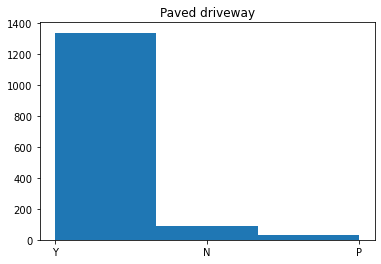

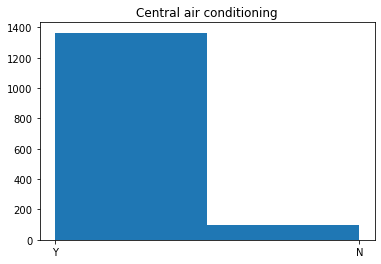

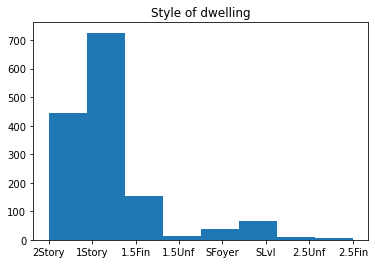

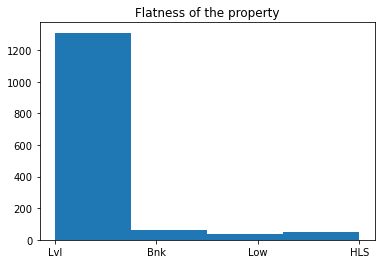

In [6]:
plt.hist(df_train['PavedDrive'], bins=3)
plt.title('Paved driveway')
plt.show()

plt.hist(df_train['CentralAir'], bins=2)
plt.title('Central air conditioning')
plt.show()

plt.hist(df_train['HouseStyle'], bins=8)
plt.title('Style of dwelling')
plt.show()

plt.hist(df_train['LandContour'], bins=4)
plt.title('Flatness of the property')
plt.show()

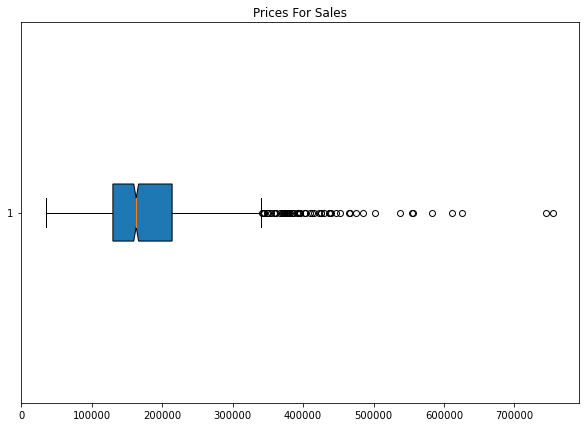

In [7]:
data = [df_train['SalePrice']]
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(data, patch_artist = True,
				notch ='True', vert = 0)

# Adding title
plt.title("Prices For Sales")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
	
# show plot
plt.show()

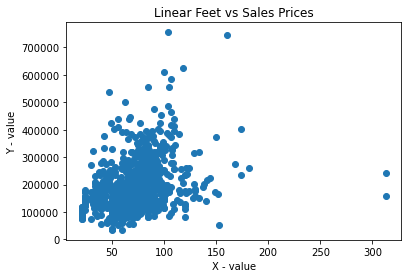

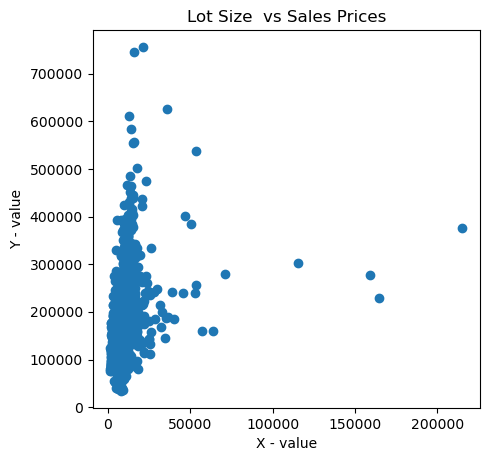

In [8]:
plt.scatter(df_train['LotFrontage'], df_train['SalePrice'])
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
plt.title('Linear Feet vs Sales Prices')
plt.xlabel('X - value')
plt.ylabel('Y - value')
plt.show()

plt.scatter(df_train['LotArea'], df_train['SalePrice'])
plt.rcParams.update({'figure.figsize':(5,5), 'figure.dpi':100})
plt.title('Lot Size  vs Sales Prices')
plt.xlabel('X - value')
plt.ylabel('Y - value')
plt.show()

### Pre Process For Dataset

Get Internal Features

In [9]:
scaler = preprocessing.MinMaxScaler()
X = np.array(df_train['Fireplaces'])
X = X.reshape(-1, 1)
scaler.fit_transform(X)


array([[0.        ],
       [0.33333333],
       [0.33333333],
       ...,
       [0.66666667],
       [0.        ],
       [0.        ]])

In [10]:
internal_featues1 = ['Electrical',
                    'Heating',
                    'HeatingQC',
                    'CentralAir',
                    'Utilities',
                    'Fireplaces',
                    'FireplaceQu',
                    'KitchenAbvGr',
                    'KitchenQual',
                    'BedroomAbvGr',
                    'MiscFeature',
                    'GarageQual',
                    'FullBath',
                    'SalePrice']
                    
                    
internal_features_dataset = df_train[internal_featues1]

In [11]:
external_featues = ['Street',
                    'YearBuilt',
                    'LandSlope',
                    'LotArea',
                    'LotShape',
                    'LotFrontage',
                    'BldgType',
                    'LandContour',
                    'Exterior1st',
                    'Foundation',
                    'SalePrice']
                    
                    
external_features_dataset = df_train[external_featues]

In [12]:
internal_features_dataset

,Electrical,Heating,HeatingQC,CentralAir,Utilities,Fireplaces,FireplaceQu,KitchenAbvGr,KitchenQual,BedroomAbvGr,MiscFeature,GarageQual,FullBath,SalePrice
0,SBrkr,GasA,Ex,Y,AllPub,0,NaN,1,Gd,3,NaN,TA,2,208500
1,SBrkr,GasA,Ex,Y,AllPub,1,TA,1,TA,3,NaN,TA,2,181500
2,SBrkr,GasA,Ex,Y,AllPub,1,TA,1,Gd,3,NaN,TA,2,223500
3,SBrkr,GasA,Gd,Y,AllPub,1,Gd,1,Gd,3,NaN,TA,1,140000
4,SBrkr,GasA,Ex,Y,AllPub,1,TA,1,Gd,4,NaN,TA,2,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,SBrkr,GasA,Ex,Y,AllPub,1,TA,1,TA,3,NaN,TA,2,175000
1456,SBrkr,GasA,TA,Y,AllPub,2,TA,1,TA,3,NaN,TA,2,210000
1457,SBrkr,GasA,Ex,Y,AllPub,2,Gd,1,Gd,4,Shed,TA,2,266500
1458,FuseA,GasA,Gd,Y,AllPub,0,NaN,1,Gd,2,NaN,TA,1,142125


In [13]:
external_features_dataset

,Street,YearBuilt,LandSlope,LotArea,LotShape,LotFrontage,BldgType,LandContour,Exterior1st,Foundation,SalePrice
0,Pave,2003,Gtl,8450,Reg,65.0,1Fam,Lvl,VinylSd,PConc,208500
1,Pave,1976,Gtl,9600,Reg,80.0,1Fam,Lvl,MetalSd,CBlock,181500
2,Pave,2001,Gtl,11250,IR1,68.0,1Fam,Lvl,VinylSd,PConc,223500
3,Pave,1915,Gtl,9550,IR1,60.0,1Fam,Lvl,Wd Sdng,BrkTil,140000
4,Pave,2000,Gtl,14260,IR1,84.0,1Fam,Lvl,VinylSd,PConc,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,Pave,1999,Gtl,7917,Reg,62.0,1Fam,Lvl,VinylSd,PConc,175000
1456,Pave,1978,Gtl,13175,Reg,85.0,1Fam,Lvl,Plywood,CBlock,210000
1457,Pave,1941,Gtl,9042,Reg,66.0,1Fam,Lvl,CemntBd,Stone,266500
1458,Pave,1950,Gtl,9717,Reg,68.0,1Fam,Lvl,MetalSd,CBlock,142125


In [14]:
corr = internal_features_dataset.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice       1.000000
FullBath        0.560664
Fireplaces      0.466929
BedroomAbvGr    0.168213
KitchenAbvGr   -0.135907
Name: SalePrice, dtype: float64


In [15]:
corr2 = external_features_dataset.corr()
corr2.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr2.SalePrice)

SalePrice      1.000000
YearBuilt      0.522897
LotFrontage    0.351799
LotArea        0.263843
Name: SalePrice, dtype: float64


In [16]:
step = (df_train['SalePrice'].max() - df_train['SalePrice'].min()) // 5
min = df_train['SalePrice'].min()                      #34900
bound1 = step + df_train['SalePrice'].min()            #178920
bound2 = (2 * step) + df_train['SalePrice'].min()      #322940
bound3 = (3 * step) + df_train['SalePrice'].min()      #466960
bound4 = (4 * step) + df_train['SalePrice'].min()      #610980
max = df_train['SalePrice'].max()                      #755000

In [17]:
class_y = df_train['SalePrice'].mask((df_train['SalePrice'] >= min) & (bound1 > df_train['SalePrice']),1)
class_y = class_y.mask((class_y >= bound1) & (bound2 > class_y),2)
class_y = class_y.mask((class_y >= bound2) & (bound3 > class_y),3)
class_y = class_y.mask((class_y >= bound3) & (bound4 > class_y),4)
class_y = class_y.mask((class_y >= bound4) & (max >= class_y),5)

In [18]:
class_y

0       2
1       2
2       2
3       1
4       2
       ..
1455    1
1456    2
1457    2
1458    1
1459    1
Name: SalePrice, Length: 1460, dtype: int64

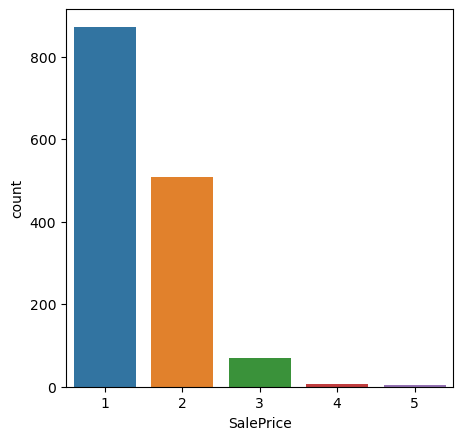

In [19]:

sns.countplot(class_y,label="Count")
plt.show()

In [20]:
internal_features_dataset.loc[:,"MiscFeature"] = internal_features_dataset.loc[:,"MiscFeature"].fillna("None")
internal_features_dataset.loc[:,"Utilities"] = internal_features_dataset.loc[:,"Utilities"].fillna("None")
internal_features_dataset.loc[:,"Electrical"] = internal_features_dataset.loc[:,"Electrical"].fillna("None")
internal_features_dataset.loc[:,"CentralAir"] = internal_features_dataset.loc[:,"CentralAir"].fillna("N")
internal_features_dataset.loc[:,"Heating"] = internal_features_dataset.loc[:,"Heating"].fillna("None")
internal_features_dataset.loc[:,"HeatingQC"] = internal_features_dataset.loc[:,"HeatingQC"].fillna("None")
internal_features_dataset.loc[:,"FireplaceQu"] = internal_features_dataset.loc[:,"FireplaceQu"].fillna("None")
internal_features_dataset.loc[:,"KitchenQual"] = internal_features_dataset.loc[:,"KitchenQual"].fillna("None")
internal_features_dataset.loc[:,"GarageQual"] = internal_features_dataset.loc[:,"GarageQual"].fillna("None")

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [21]:
external_features_dataset.loc[:,"Street"] = external_features_dataset.loc[:,"Street"].fillna("None")
external_features_dataset.loc[:,"LotShape"] = external_features_dataset.loc[:,"LotShape"].fillna("None")
external_features_dataset.loc[:,"LandContour"] = external_features_dataset.loc[:,"LandContour"].fillna("None")
external_features_dataset.loc[:,"LandSlope"] = external_features_dataset.loc[:,"LandSlope"].fillna("None")
external_features_dataset.loc[:,"BldgType"] = external_features_dataset.loc[:,"BldgType"].fillna("None")
external_features_dataset.loc[:,"Exterior1st"] = external_features_dataset.loc[:,"Exterior1st"].fillna("None")
external_features_dataset.loc[:,"Foundation"] = external_features_dataset.loc[:,"Foundation"].fillna("None")
external_features_dataset.loc[:,"YearBuilt"] = external_features_dataset.loc[:,"YearBuilt"].fillna(1900)
external_features_dataset.loc[:,"LotArea"] = external_features_dataset.loc[:,"LotArea"].fillna(df_train["LotArea"].mean())
external_features_dataset.loc[:,"LotFrontage "] = external_features_dataset.loc[:,"LotFrontage"].fillna(df_train["LotFrontage"].mean())
external_features_dataset.loc[:,"Foundation"] = external_features_dataset.loc[:,"Foundation"].fillna("None")

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [22]:
nan_idx_array = external_features_dataset['LotFrontage'].index[df_train['LotFrontage'].apply(np.isnan)]

In [23]:
for idx in nan_idx_array:
    external_features_dataset['LotFrontage'].iloc[idx] = df_train["LotFrontage"].mean()

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_13924/2509988170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  external_features_dataset['LotFrontage'].iloc[idx] = df_train["LotFrontage"].mean()


In [24]:
internal_features_dataset = internal_features_dataset.replace({
                                "Heating" : {"Floor" : 1, "GasA" : 2, "GasW": 3, "Grav": 4, "OthW" : 5, "Wall" : 6, "None" : 7},
                                "HeatingQC" : {"Ex" : 1, "Gd" : 2, "TA": 3, "Fa": 4, "Po" : 5, "None" :6},
                                "FireplaceQu" : {"Ex" : 1, "Gd" : 2, "TA": 3, "Fa": 4, "Po" : 5, "None" :6},
                                "KitchenQual" : {"Ex" : 1, "Gd" : 2, "TA": 3, "Fa": 4, "Po" : 5, "None" :6},
                                "GarageQual" : {"Ex" : 1, "Gd" : 2, "TA": 3, "Fa": 4, "Po" : 5, "None" :6},
                               "MiscFeature" : {"Elev" : 1, "Gar2" : 2, "Othr" : 3, "Shed" : 4, "TenC": 5, "None" : 6},
                               "CentralAir" : {"N" : 1, "Y" : 2},
                               "Electrical" : {"SBrkr" : 1, "FuseA" : 2, "FuseF" : 3, "FuseP" : 4, "Mix" : 5, "None" : 6},
                               "Utilities" : {"AllPub" : 1, "NoSewr" : 2, "NoSeWa" : 3, "ELO" : 4, "None" : 5}
                                }
                             )
internal_features_dataset

,Electrical,Heating,HeatingQC,CentralAir,Utilities,Fireplaces,FireplaceQu,KitchenAbvGr,KitchenQual,BedroomAbvGr,MiscFeature,GarageQual,FullBath,SalePrice
0,1,2,1,2,1,0,6,1,2,3,6,3,2,208500
1,1,2,1,2,1,1,3,1,3,3,6,3,2,181500
2,1,2,1,2,1,1,3,1,2,3,6,3,2,223500
3,1,2,2,2,1,1,2,1,2,3,6,3,1,140000
4,1,2,1,2,1,1,3,1,2,4,6,3,2,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,2,1,2,1,1,3,1,3,3,6,3,2,175000
1456,1,2,3,2,1,2,3,1,3,3,6,3,2,210000
1457,1,2,1,2,1,2,2,1,2,4,4,3,2,266500
1458,2,2,2,2,1,0,6,1,2,2,6,3,1,142125


In [25]:
external_features_dataset = external_features_dataset.replace({"Street" : {"Grvl" : 1, "Pave" : 2, "None" : 3},
                               "LotShape" : {"Reg" : 1, "IR1" : 2, "IR2" : 3, "IR3" : 4, "None" : 5},
                               "LandContour" : {"Lvl" : 1, "Bnk" : 2, "HLS" : 3, "Low" : 4, "None" : 5},
                               "LandSlope" : {"Gtl" : 1, "Mod" : 2, "Sev" : 3, "None" : 4},
                               "BldgType" : {"1Fam" : 1, "2fmCon" : 2, "Duplex" : 3, "TwnhsE" : 4, "Twnhs" : 5, "None" : 6},
                               "Exterior1st" : {"AsbShng" : 1, "AsphShn" : 2, "BrkComm" : 3, "BrkFace" : 4, "CBlock" : 5, "CemntBd" : 6, "HdBoard" : 7, "ImStucc" : 8, "MetalSd" : 9, "Other" : 10, "Plywood" : 11, "PreCast" : 12, "Stone" : 13, "Stucco" : 14, "VinylSd" : 15, "Wd Sdng" : 16, "WdShing" : 17, "None" : 18},
                               "Foundation" : {"BrkTil" : 1, "CBlock" : 2, "PConc" : 3, "Slab" : 4, "Stone" : 5, "Wood" : 6, "None" : 7}}
                             )
external_features_dataset

,Street,YearBuilt,LandSlope,LotArea,LotShape,LotFrontage,BldgType,LandContour,Exterior1st,Foundation,SalePrice,LotFrontage
0,2,2003,1,8450,1,65.0,1,1,15,3,208500,65.0
1,2,1976,1,9600,1,80.0,1,1,9,2,181500,80.0
2,2,2001,1,11250,2,68.0,1,1,15,3,223500,68.0
3,2,1915,1,9550,2,60.0,1,1,16,1,140000,60.0
4,2,2000,1,14260,2,84.0,1,1,15,3,250000,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,2,1999,1,7917,1,62.0,1,1,15,3,175000,62.0
1456,2,1978,1,13175,1,85.0,1,1,11,2,210000,85.0
1457,2,1941,1,9042,1,66.0,1,1,6,5,266500,66.0
1458,2,1950,1,9717,1,68.0,1,1,9,2,142125,68.0


In [26]:

internal_features_dataset = internal_features_dataset.drop(columns=['SalePrice'])

In [27]:
external_features_dataset = external_features_dataset.drop(columns=['SalePrice'])

In [28]:


train_set, test_set, train_result, test_result = train_test_split(internal_features_dataset, class_y, test_size = 0.3, random_state = 0)
print(train_set.shape)
print(test_set.shape)
print(train_result.shape)
print(test_result.shape)

(1022, 13)
(438, 13)
(1022,)
(438,)


In [29]:


train_set2, test_set2, train_result2, test_result2 = train_test_split(external_features_dataset, class_y, test_size = 0.3, random_state = 0)
print(train_set2.shape)
print(test_set2.shape)
print(train_result2.shape)
print(test_result2.shape)

(1022, 11)
(438, 11)
(1022,)
(438,)


In [30]:
external_features_dataset

,Street,YearBuilt,LandSlope,LotArea,LotShape,LotFrontage,BldgType,LandContour,Exterior1st,Foundation,LotFrontage
0,2,2003,1,8450,1,65.0,1,1,15,3,65.0
1,2,1976,1,9600,1,80.0,1,1,9,2,80.0
2,2,2001,1,11250,2,68.0,1,1,15,3,68.0
3,2,1915,1,9550,2,60.0,1,1,16,1,60.0
4,2,2000,1,14260,2,84.0,1,1,15,3,84.0
...,...,...,...,...,...,...,...,...,...,...,...
1455,2,1999,1,7917,1,62.0,1,1,15,3,62.0
1456,2,1978,1,13175,1,85.0,1,1,11,2,85.0
1457,2,1941,1,9042,1,66.0,1,1,6,5,66.0
1458,2,1950,1,9717,1,68.0,1,1,9,2,68.0


### Classification And Results

In [31]:
def classificateByKNeighbors(train_dataset,train_result,test_dataset,test_result, num_of_class = 5):
    
    knn = KNeighborsClassifier(num_of_class)
    knn.fit(train_dataset, train_result)
    print("=====================================================")
    print('Accuracy of K-NN classifier on training set: {:.2f}'
         .format(knn.score(train_dataset, train_result)))
    print('Accuracy of K-NN classifier on test set: {:.2f}'
         .format(knn.score(test_dataset, test_result)))
    
    knn_predict_result = knn.predict(test_dataset)

    result_confusion_matrix = confusion_matrix(knn_predict_result, test_result) 

    f,ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(result_confusion_matrix, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


    print("f1-score :" + str(f1_score(test_result, knn_predict_result, average="macro")))
    print("precision score :" + str(precision_score(test_result, knn_predict_result, average="macro")))
    print("recall score :" + str(recall_score(test_result, knn_predict_result, average="macro")))
    print("=====================================================")
    
    

Accuracy of K-NN classifier on training set: 0.82
Accuracy of K-NN classifier on test set: 0.76


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


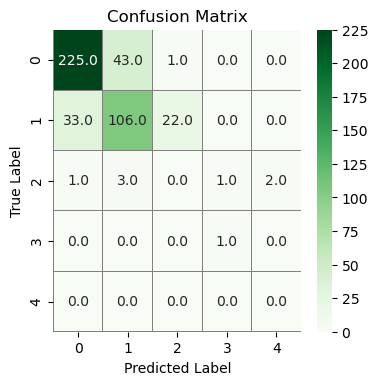

f1-score :0.4392511375738213
precision score :0.4989632639867002
recall score :0.41321885795570007
Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.79


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


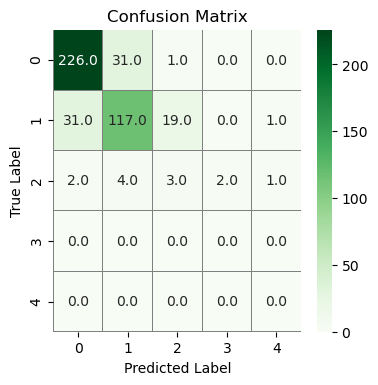

f1-score :0.3553906465874551
precision score :0.3644795127353267
recall score :0.3545516994601663
Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.79


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


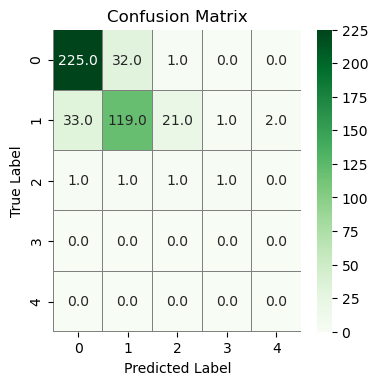

f1-score :0.3340180039453522
precision score :0.3596458773784355
recall score :0.3390197732875079


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:

classificateByKNeighbors(train_set,train_result,test_set,test_result,5)
classificateByKNeighbors(train_set,train_result,test_set,test_result,10)
classificateByKNeighbors(train_set,train_result,test_set,test_result,15)

Accuracy of K-NN classifier on training set: 0.80
Accuracy of K-NN classifier on test set: 0.70


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


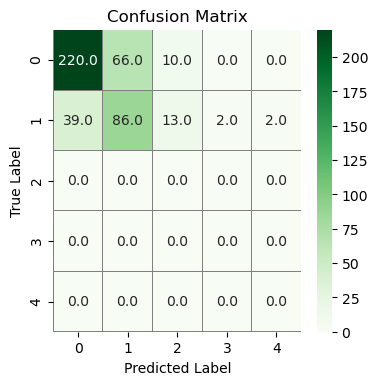

f1-score :0.27556536127964704
precision score :0.2697754092120289
recall score :0.283042064621012
Accuracy of K-NN classifier on training set: 0.73
Accuracy of K-NN classifier on test set: 0.63


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


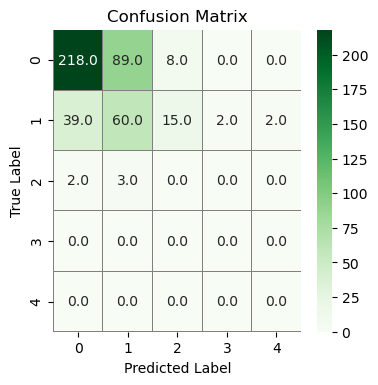

f1-score :0.24080526519550913
precision score :0.2401076136669357
recall score :0.24728713676082098
Accuracy of K-NN classifier on training set: 0.71
Accuracy of K-NN classifier on test set: 0.66


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


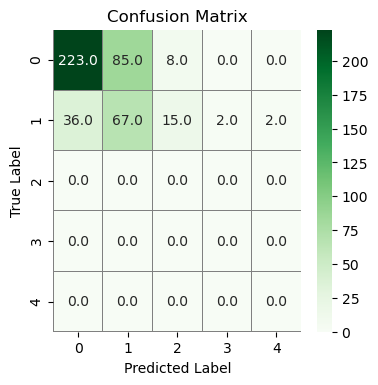

f1-score :0.2529406537607109
precision score :0.2509753060800996
recall score :0.2603586669376143


C:\Users\Lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:

classificateByKNeighbors(train_set2, train_result2, test_set2, test_result2,5)
classificateByKNeighbors(train_set2, train_result2, test_set2, test_result2,10)
classificateByKNeighbors(train_set2, train_result2, test_set2, test_result2,15)

### Modelling  And Results

In [35]:
def modellingByAdaBoost(train_dataset,train_result,test_dataset,test_result, num_of_estimators = 100):
    
    
    ada_boost = AdaBoostRegressor(n_estimators=num_of_estimators, random_state=2)
    ada_boost.fit(train_dataset, train_result)
    print("=====================================================")
    print('Accuracy of  Ada Boost Regreessor on training set: {:.2f}'
         .format(ada_boost.score(train_dataset, train_result)))
    print('Accuracy of Ada Boost Regreessor on test set: {:.2f}'
         .format(ada_boost.score(test_dataset, test_result)))
    print("=====================================================")

In [36]:

modellingByAdaBoost(train_set,train_result,test_set,test_result, 100)
modellingByAdaBoost(train_set,train_result,test_set,test_result, 150)
modellingByAdaBoost(train_set,train_result,test_set,test_result, 200)


Accuracy of  Ada Boost Regreessor on training set: 0.30
Accuracy of Ada Boost Regreessor on test set: 0.24
Accuracy of  Ada Boost Regreessor on training set: 0.30
Accuracy of Ada Boost Regreessor on test set: 0.24
Accuracy of  Ada Boost Regreessor on training set: 0.30
Accuracy of Ada Boost Regreessor on test set: 0.24


In [37]:

modellingByAdaBoost(train_set2, train_result2, test_set2, test_result2, 100)
modellingByAdaBoost(train_set2, train_result2, test_set2, test_result2, 150)
modellingByAdaBoost(train_set2, train_result2, test_set2, test_result2, 200)

Accuracy of  Ada Boost Regreessor on training set: 0.49
Accuracy of Ada Boost Regreessor on test set: 0.39
Accuracy of  Ada Boost Regreessor on training set: 0.49
Accuracy of Ada Boost Regreessor on test set: 0.39
Accuracy of  Ada Boost Regreessor on training set: 0.49
Accuracy of Ada Boost Regreessor on test set: 0.39


### Post Calssification  And Results

In [38]:
def modellingByNaiveBayes(train_dataset,train_result,test_dataset,test_result):
    
    naive_bayes = GaussianNB()
    naive_bayes.fit(train_dataset, train_result)
    print('Accuracy of Naive Bayes classifier on training set: {:.2f}'
         .format(naive_bayes.score(train_dataset, train_result)))
    print('Accuracy of Naive Bayes classifier on test set: {:.2f}'
         .format(naive_bayes.score(test_dataset, test_result)))
    
    naive_bayes_predict_result = naive_bayes.predict(test_dataset)

    result_confusion_matrix = confusion_matrix(naive_bayes_predict_result, test_result) 

    f,ax = plt.subplots(figsize=(4, 4))
    sns.heatmap(result_confusion_matrix, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()


    print("f1-score :" + str(f1_score(test_result, naive_bayes_predict_result, average="macro")))
    print("precision score :" + str(precision_score(test_result, naive_bayes_predict_result, average="macro")))
    print("recall score :" + str(recall_score(test_result, naive_bayes_predict_result, average="macro")))


Accuracy of Naive Bayes classifier on training set: 0.21
Accuracy of Naive Bayes classifier on test set: 0.22


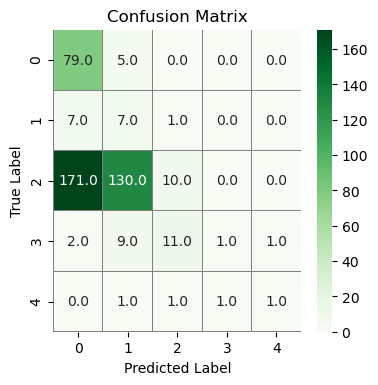

f1-score :0.20292207690472383
precision score :0.34619277292910733
recall score :0.3571709090587809


In [39]:

modellingByNaiveBayes(train_set,train_result,test_set,test_result)

Accuracy of Naive Bayes classifier on training set: 0.71
Accuracy of Naive Bayes classifier on test set: 0.73


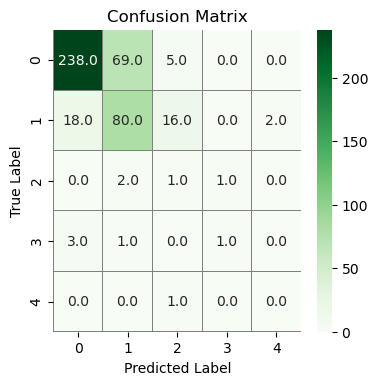

f1-score :0.358085700815136
precision score :0.38049513704686116
recall score :0.39774259385243366


In [40]:
modellingByNaiveBayes(train_set2, train_result2, test_set2, test_result2)